In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
delhi = pd.read_csv("delhi.csv")
benga = pd.read_csv("bengaluru.csv")
pune = pd.read_csv("maharashtra_pune.csv")

In [3]:
delhi['State'] = 'Delhi'
benga['State'] = 'Karnataka'
pune['State'] = 'Maharashtra'

In [4]:
df = pd.concat([delhi, benga, pune])

In [5]:
df.shape

(361, 6)

In [6]:
df.head()

,Unnamed: 0,name,rating,address,phone,State
0,0,Yadav Motor Driving College | Best Car Driving...,4.7,"61 A, kamla nagar near Shakti Nagar Chowk, opp...",099909 16544,Delhi
1,1,New Nanda Motor Driving School,4.5,"58 A/1, GROUND FLOOR, KALU SARAI, Block 1, Sar...",098997 74490,Delhi
2,2,BALAJI MOTOR DRIVING TRAINING SCHOOL (GOVERNME...,4.7,"138-A/2, Taimoor Nagar, Maharani Bagh Main Roa...",098181 66628,Delhi
3,3,N K Motor Driving Training School,4.9,"Block E - 311-312, Gandhi vihar, Near E block ...",084474 19076,Delhi
4,4,Motor Driving Training School,4.6,"Kali Nagar, Mahavir Enclave I, Mahavir Enclave...",098711 97260,Delhi


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.head()

,name,rating,address,phone,State
0,Yadav Motor Driving College | Best Car Driving...,4.7,"61 A, kamla nagar near Shakti Nagar Chowk, opp...",099909 16544,Delhi
1,New Nanda Motor Driving School,4.5,"58 A/1, GROUND FLOOR, KALU SARAI, Block 1, Sar...",098997 74490,Delhi
2,BALAJI MOTOR DRIVING TRAINING SCHOOL (GOVERNME...,4.7,"138-A/2, Taimoor Nagar, Maharani Bagh Main Roa...",098181 66628,Delhi
3,N K Motor Driving Training School,4.9,"Block E - 311-312, Gandhi vihar, Near E block ...",084474 19076,Delhi
4,Motor Driving Training School,4.6,"Kali Nagar, Mahavir Enclave I, Mahavir Enclave...",098711 97260,Delhi


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 120
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     361 non-null    object 
 1   rating   361 non-null    float64
 2   address  361 non-null    object 
 3   phone    292 non-null    object 
 4   State    361 non-null    object 
dtypes: float64(1), object(4)
memory usage: 16.9+ KB


In [10]:
print(df.address.iloc[0])
print(df.address.iloc[1])

61 A, kamla nagar near Shakti Nagar Chowk, opp. Gopal Sweets, Kamla Nagar, Delhi, 110007
58 A/1, GROUND FLOOR, KALU SARAI, Block 1, Sarvapriya Vihar, NEAR HDFC BANK ATM, New Delhi, Delhi 110017


In [11]:
df['pincode'] = df['address'].apply(lambda x: x.split()[-1])

In [12]:
invalid = df.pincode.str.isnumeric()
df.loc[~invalid, 'pincode'] = np.nan

In [13]:
df.pincode.str.isnumeric().sum()

360

In [14]:
df.isnull().sum()

name        0
rating      0
address     0
phone      69
State       0
pincode     1
dtype: int64

In [15]:
df['rating_range'] = np.floor(df['rating'])

In [16]:
def rating(x):
    if x>=4:
        return "Best"
    elif x>=2.5:
        return "Good"
    elif x>1:
        return "Bad"
    else:
        return "Worst"
    
df['review'] = df['rating'].map(rating)

In [17]:
df.head()

,name,rating,address,phone,State,pincode,rating_range,review
0,Yadav Motor Driving College | Best Car Driving...,4.7,"61 A, kamla nagar near Shakti Nagar Chowk, opp...",099909 16544,Delhi,110007,4.0,Best
1,New Nanda Motor Driving School,4.5,"58 A/1, GROUND FLOOR, KALU SARAI, Block 1, Sar...",098997 74490,Delhi,110017,4.0,Best
2,BALAJI MOTOR DRIVING TRAINING SCHOOL (GOVERNME...,4.7,"138-A/2, Taimoor Nagar, Maharani Bagh Main Roa...",098181 66628,Delhi,110065,4.0,Best
3,N K Motor Driving Training School,4.9,"Block E - 311-312, Gandhi vihar, Near E block ...",084474 19076,Delhi,110009,4.0,Best
4,Motor Driving Training School,4.6,"Kali Nagar, Mahavir Enclave I, Mahavir Enclave...",098711 97260,Delhi,110045,4.0,Best


In [18]:
import pgeocode

nomi = pgeocode.Nominatim('in')
pincodes = nomi.query_postal_code(df['pincode'].unique())

In [19]:
pincodes.head()

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,110007,IN,"Kamla Nagar (North Delhi), R.C.A.O., C.C.I., S...",Delhi,7.0,North Delhi,91.0,Delhi,NaN,28.67640,77.20740,3.0
1,110017,IN,"South Malviya Nagar, Sarvodya Enclave, Distt. ...",Delhi,7.0,South Delhi,98.0,New Delhi,NaN,28.51890,77.21310,3.0
2,110065,IN,"Nehru Nagar (South Delhi), East Of Kailash Pha...",Delhi,7.0,South Delhi,98.0,New Delhi,NaN,28.56192,77.25528,3.0
3,110009,IN,"Nirankari Colony, Model Town III, Model Town I...",Delhi,7.0,North West Delhi,90.0,Delhi,NaN,28.71210,77.20600,4.0
4,110045,IN,"Mahavir Enclave, Durga Park, Dabri, Nasirpur, ...",Delhi,7.0,West Delhi,96.0,New Delhi,NaN,28.60350,77.08940,3.0


In [20]:
county = dict(zip(pincodes['postal_code'], pincodes['county_name']))

In [21]:
df['county'] = df['pincode'].map(county)

In [22]:
df.head()

,name,rating,address,phone,State,pincode,rating_range,review,county
0,Yadav Motor Driving College | Best Car Driving...,4.7,"61 A, kamla nagar near Shakti Nagar Chowk, opp...",099909 16544,Delhi,110007,4.0,Best,North Delhi
1,New Nanda Motor Driving School,4.5,"58 A/1, GROUND FLOOR, KALU SARAI, Block 1, Sar...",098997 74490,Delhi,110017,4.0,Best,South Delhi
2,BALAJI MOTOR DRIVING TRAINING SCHOOL (GOVERNME...,4.7,"138-A/2, Taimoor Nagar, Maharani Bagh Main Roa...",098181 66628,Delhi,110065,4.0,Best,South Delhi
3,N K Motor Driving Training School,4.9,"Block E - 311-312, Gandhi vihar, Near E block ...",084474 19076,Delhi,110009,4.0,Best,North West Delhi
4,Motor Driving Training School,4.6,"Kali Nagar, Mahavir Enclave I, Mahavir Enclave...",098711 97260,Delhi,110045,4.0,Best,West Delhi


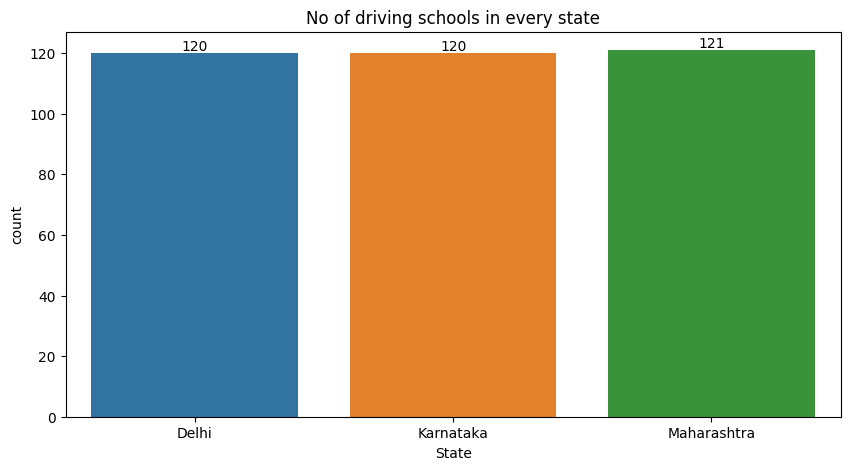

In [23]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='State')
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.title('No of driving schools in every state')
plt.show()

<ul>
    <li>Every state has same no of driving schools in data.</li>
</ul>

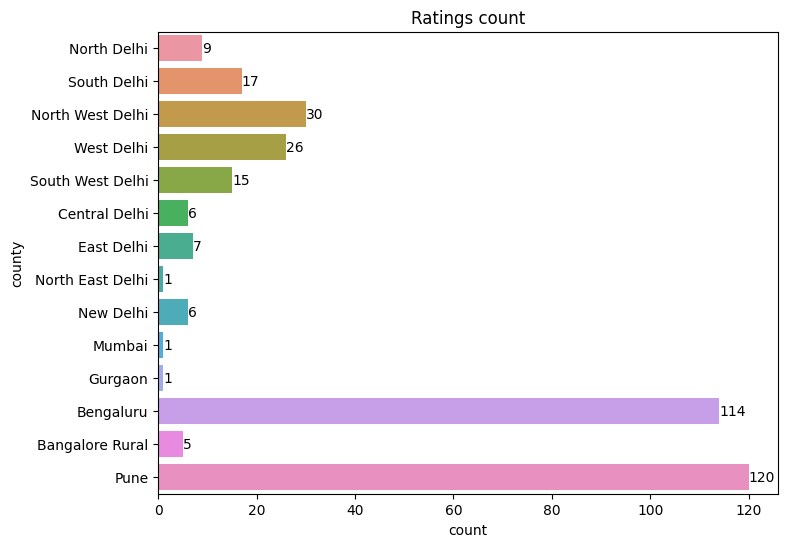

In [29]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, y='county')
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.title('Ratings count')
plt.show()

In [53]:
df['county'].unique()

array(['North Delhi', 'South Delhi', 'North West Delhi', 'West Delhi',
       'South West Delhi', 'Central Delhi', 'East Delhi',
       'North East Delhi', 'New Delhi', 'Mumbai', 'Other', 'Gurgaon',
       'Bengaluru', 'Bangalore Rural', 'Pune'], dtype=object)

In [54]:
df['county'] = df['county'].fillna('Other')

In [55]:
county_values = df['county'].value_counts()
county_values

Pune                120
Bengaluru           114
North West Delhi     30
West Delhi           26
South Delhi          17
South West Delhi     15
North Delhi           9
East Delhi            7
Central Delhi         6
New Delhi             6
Bangalore Rural       5
Other                 3
North East Delhi      1
Mumbai                1
Gurgaon               1
Name: county, dtype: int64

In [56]:
df['county_updated'] = df['county'].apply(lambda x: 'Other' if county_values[x] <= 10 else x)
df['county_updated'].value_counts()

Pune                120
Bengaluru           114
Other                39
North West Delhi     30
West Delhi           26
South Delhi          17
South West Delhi     15
Name: county_updated, dtype: int64

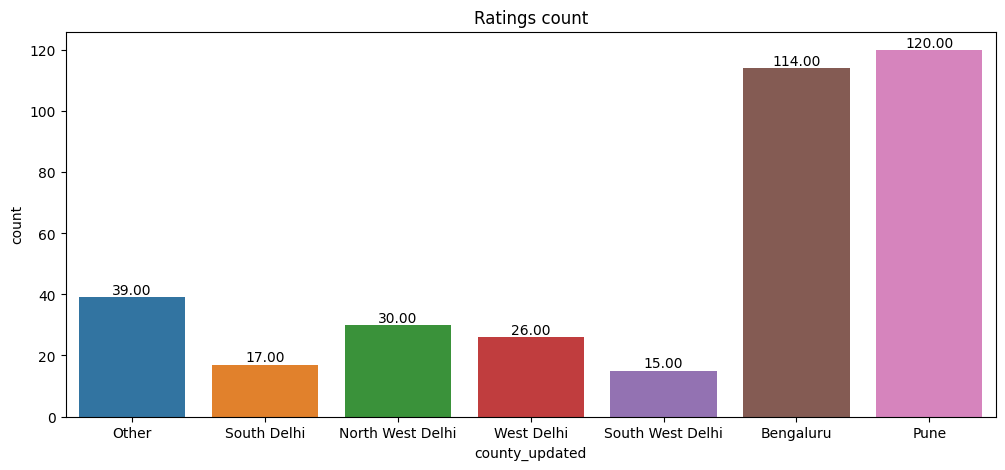

In [66]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, x='county_updated')
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Ratings count')
plt.show()

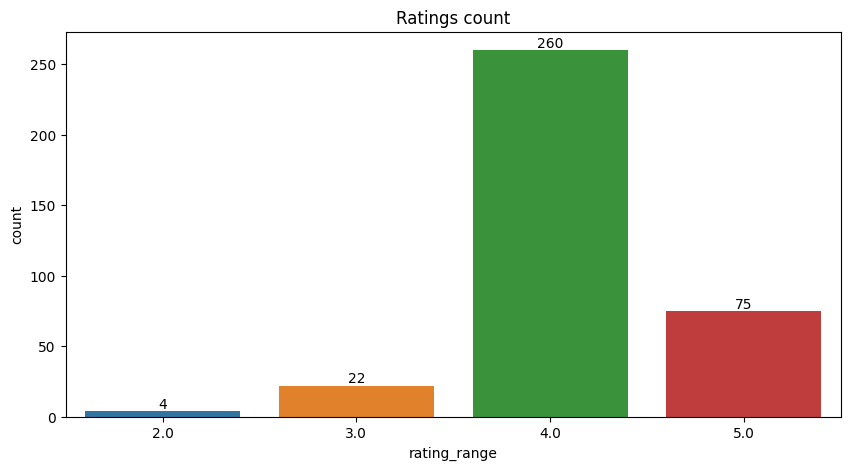

In [67]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='rating_range')
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.title('Ratings count')
plt.show()

<ul>
    <li>Most of driving schools have good ratings (Greater than 4).</li>
    <li>There are only 26 driving schools have less ratings (Less than 4).</li>
</ul>

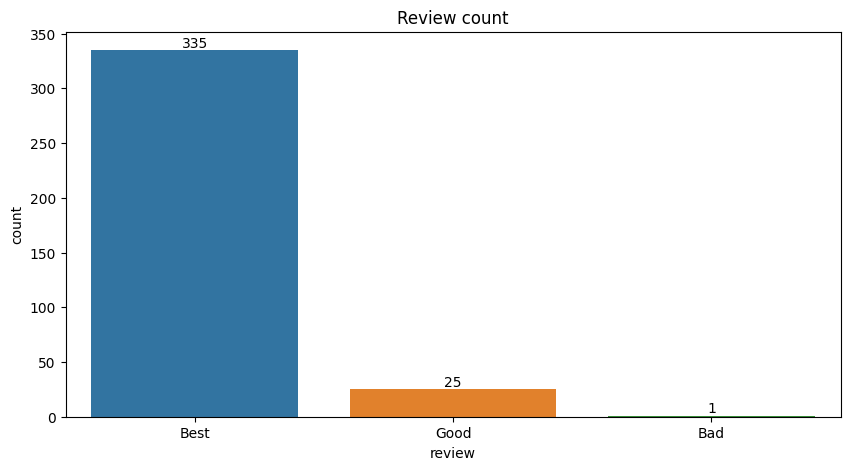

In [68]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='review')
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.title('Review count')
plt.show()

<ul>
	<li>Almost 92% of driving schools have best ratings.</li>
    <li>Only 1 driving school (Manikaran Motor Driving School) have the bad ratings which is located in South West Delhi.</li>
</ul>

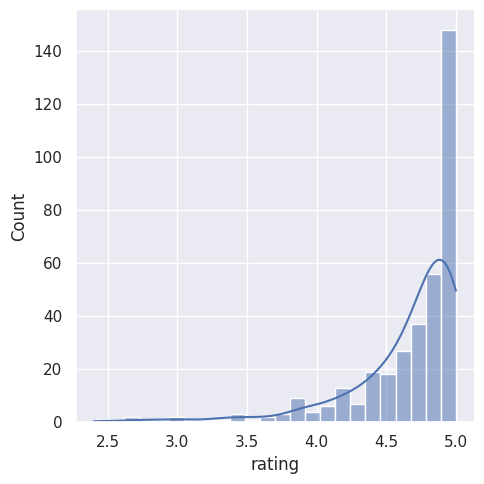

In [69]:
sns.set_theme(style="darkgrid")
sns.displot(df['rating'], kde=True)

In [70]:
review_state = df.pivot_table(index=['State', 'review'], values='name', aggfunc=np.size, sort=True).reset_index()

In [71]:
review_state

,State,review,name
0,Delhi,Bad,1
1,Delhi,Best,106
2,Delhi,Good,13
3,Karnataka,Best,114
4,Karnataka,Good,6
5,Maharashtra,Best,115
6,Maharashtra,Good,6


In [72]:
review_county = df.pivot_table(index=['county', 'review'], values='name', aggfunc=np.size, sort=True).reset_index()

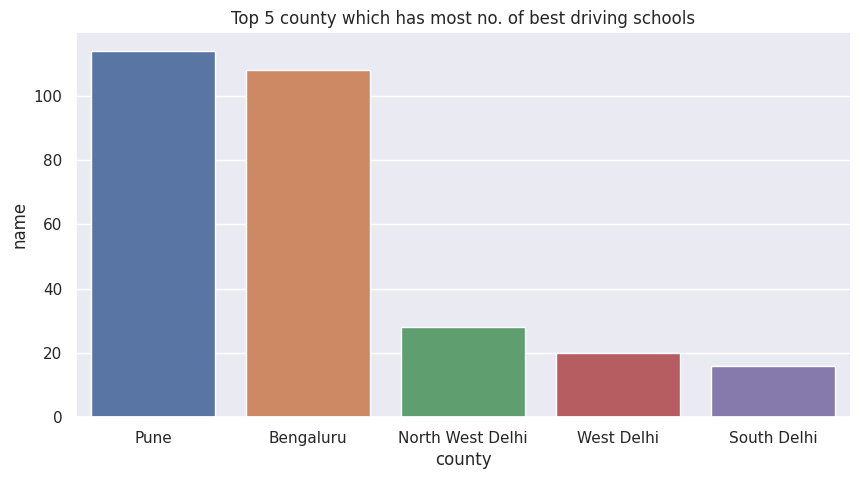

In [73]:
plt.figure(figsize=(10,5))
sns.barplot(data=review_county.sort_values("name", ascending=False, ignore_index=True).head(5), x='county', y='name')
plt.title("Top 5 county which has most no. of best driving schools")
plt.show()

<ul>
	<li>Pune and Bengaluru has great no of best driving schools.</li>
    <li>North West Delhi, West Delhi, South Delhi have significant diffrence.</li>
</ul>

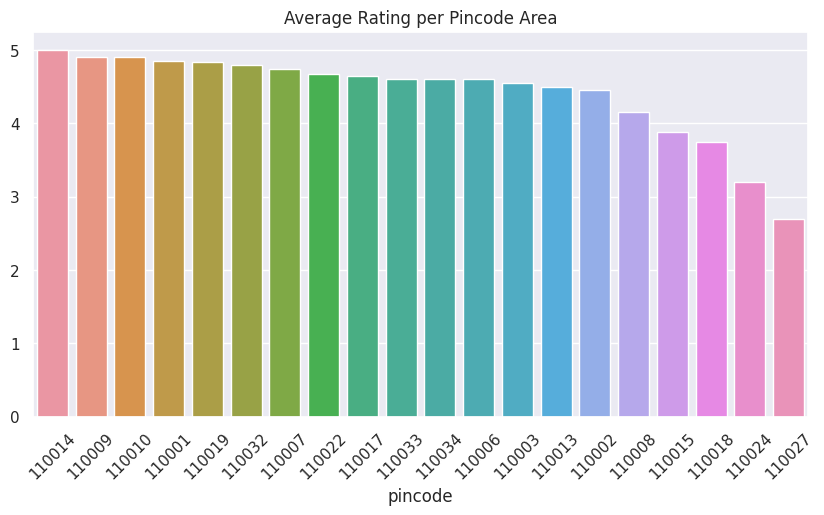

In [74]:
plt.figure(figsize=(10,5))
data = df.groupby('pincode')['rating'].mean().head(20)
sns.barplot(x=data.index, y=data.values, order=data.sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.title("Average Rating per Pincode Area")
plt.show()

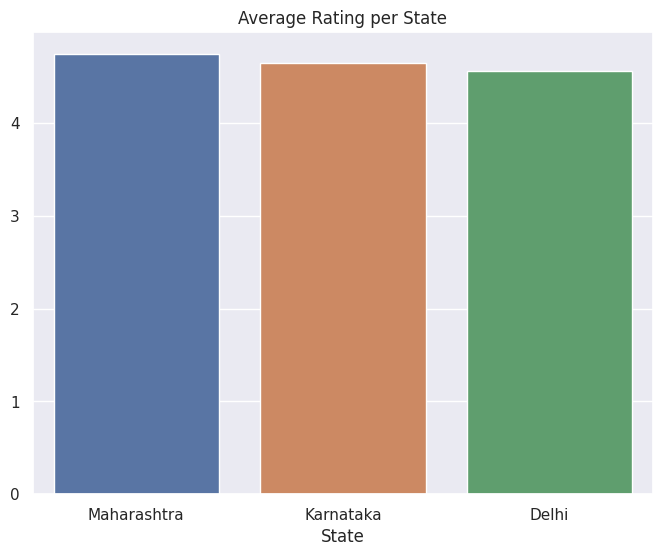

In [75]:
plt.figure(figsize=(8, 6))
data = df.groupby('State')['rating'].mean().sort_values(ascending=False)
sns.barplot(y=data.values, x=data.index)
plt.title("Average Rating per State")
plt.show()

<ul>
	<li>There is no significant difference between rating ratings per state.</li>
    <li>Maharastra has the most rated drivings schools followed by Karnataka and Delhi.</li>
</ul>

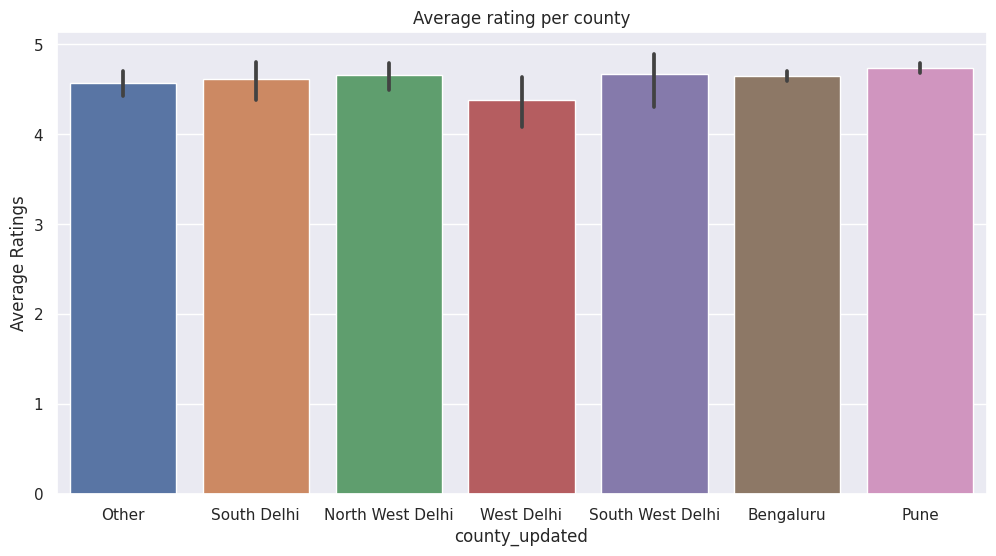

In [83]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='county_updated', y='rating')
plt.title('Average rating per county')
plt.ylabel('Average Ratings')
plt.show()